<h1>Watching from above

## Team composition:
* **Fabrice**
* **Ludovica**
* **Luis**
* **Pablo**
* **Rui**

# Notebook preparation 

## Packages
--> Install the necessary packages in the new environment

* pip install tensorflow
* pip install tdqm

## librairies import

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm # to observ the progression
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt

2022-12-06 14:59:09.174610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 14:59:09.694676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 14:59:09.694760: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 14:59:13.657651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

# Data preparation

## Load data 

In [2]:
os.getcwd()

'/home/ludovica.baldi/code/pabloknecht/watching-from-above/notebooks'

In [3]:
data_path = '../raw_data/EuroSAT'

classes_name = os.listdir(os.path.join(data_path))

f'Number of classes : {len(classes_name)} '

'Number of classes : 10 '

## Balance / Unbalance checking 
--> (number images per category)

In [4]:
for i in range(len(classes_name)):
    images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
    print(
        f'{classes_name[i]} :   {len(images_per_cat)} images'
        )    

River :   2500 images
Forest :   3000 images
Residential :   3000 images
Highway :   2500 images
Pasture :   2000 images
PermanentCrop :   2500 images
AnnualCrop :   3000 images
SeaLake :   3000 images
Industrial :   2500 images
HerbaceousVegetation :   3000 images


**Dataset already balanced = No action**

## Dataset conversion with labels encoding

In [5]:
def conv_data():
    
    classes = {
            'AnnualCrop':0,
            'Forest':1, 
            'HerbaceousVegetation':2,
            'Highway':3,
            'Industrial':4,
            'Pasture':5,
            'PermanentCrop':6,
            'Residential':7,
            'River':8,
            'SeaLake':9,
            }
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:3000]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                if image.size != (64,64):
                    print(f'error size {img}')
                image = image.resize((64, 64))
                imgs.append(np.array(image))
                labels.append(i)
    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)
    
    # Shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]
    
    return X, y, imgs

In [6]:
X, y, imgs = conv_data()

100%|█████████████████████████████████████████████████| 3000/3000 [00:05<00:00, 599.49it/s]


Let's check the datas format after loading (and also encoding for y) :

In [7]:
print("______________Check X________________________")
print(f'X shape : {X.shape},min X value is : {np.min(X)}, Max X value is : {np.max(X)} ')
print("______________Check y _______________________")
print(f'y shape : {y.shape}')

______________Check X________________________
X shape : (27000, 64, 64, 3),min X value is : 0, Max X value is : 255 
______________Check y _______________________
y shape : (27000, 10)


2499
4998
7497
9996
12495
14994
17493
19992
22491
24990


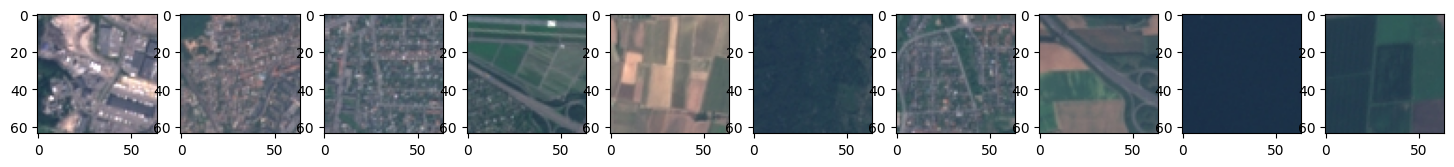

In [8]:
k=0
plt.figure(figsize=(20,15))
for i in range(len(classes_name)):
    plt.subplot(1,11, i+1)
    img = np.squeeze(X[k])
    plt.imshow(img, cmap='gray')
    k+=2499
    
    print(k)


## Train & test split :

In [9]:
    first_split = int(len(imgs) * 0.1) # X_tests = 10% 
    second_split = first_split + int(len(imgs) * 0.1)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    print(f'X_train shape : {X_train.shape},X_val shape : {X_val.shape}, X_test shape : {X_test.shape}')
    print(f'y_train shape : {y_train.shape},y_val shape : {y_val.shape},  y_test shape : {y_test.shape}')

X_train shape : (16200, 64, 64, 3),X_val shape : (5400, 64, 64, 3), X_test shape : (5400, 64, 64, 3)
y_train shape : (16200, 10),y_val shape : (5400, 10),  y_test shape : (5400, 10)


## Data scaling checking

In [10]:
# Testing whether we need to normalize or not
f'X_train min = {np.min(X_train)}, X_train Max = {np.max(X_train)}, X_test min = {np.min(X_test)}, X_test Max = {np.max(X_test)}'


'X_train min = 0, X_train Max = 255, X_test min = 0, X_test Max = 255'

**--> Will be done in the model**

# Model

## Dummy model

In [11]:
list=[]
for i in range(len(classes_name)):
    images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
    list.append((len(images_per_cat)/27000))
    print(f'{(len(images_per_cat)/27000)} probability of classe {i}')  

0.09259259259259259 probability of classe 0
0.1111111111111111 probability of classe 1
0.1111111111111111 probability of classe 2
0.09259259259259259 probability of classe 3
0.07407407407407407 probability of classe 4
0.09259259259259259 probability of classe 5
0.1111111111111111 probability of classe 6
0.1111111111111111 probability of classe 7
0.09259259259259259 probability of classe 8
0.1111111111111111 probability of classe 9


In [12]:
import numpy as np
np.mean(list)

0.1

##  Basic model

In [13]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_basic_model():
    
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(64,64,3)))
    
    model.add(layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
 
    model.add(layers.Conv2D(32, kernel_size=(2,2), padding='same', activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    #model.add(layers.Conv2D(64, kernel_size=(2,2), padding='same', activation="relu"))
    #model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [14]:
model_basic = load_basic_model()
model_basic.summary()

2022-12-06 15:00:25.070427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-06 15:00:25.070610: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-06 15:00:25.070699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (schneider-1091-ludovica-baldi): /proc/driver/nvidia/version does not exist
2022-12-06 15:00:25.071930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [15]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   patience = 5, 
                   restore_best_weights = True,
                   verbose = 1, 
                   )

history = model_basic.fit(X_train, y_train,
                             validation_data = (X_val, y_val),
                             batch_size = 32, 
                             epochs = 100, 
                             callbacks=[es])

Epoch 1/100
507/507 [==============================] - 54s 102ms/step - loss: 1.8753 - accuracy: 0.3054 - val_loss: 1.6305 - val_accuracy: 0.3787
Epoch 2/100
507/507 [==============================] - 45s 89ms/step - loss: 1.5245 - accuracy: 0.4198 - val_loss: 1.4776 - val_accuracy: 0.4357
Epoch 3/100
507/507 [==============================] - 41s 80ms/step - loss: 1.4155 - accuracy: 0.4680 - val_loss: 1.3890 - val_accuracy: 0.4739
Epoch 4/100
507/507 [==============================] - 40s 80ms/step - loss: 1.3413 - accuracy: 0.5094 - val_loss: 1.3232 - val_accuracy: 0.4920
Epoch 5/100
507/507 [==============================] - 44s 86ms/step - loss: 1.2739 - accuracy: 0.5389 - val_loss: 1.2581 - val_accuracy: 0.5593
Epoch 6/100
507/507 [==============================] - 40s 80ms/step - loss: 1.2103 - accuracy: 0.5752 - val_loss: 1.1914 - val_accuracy: 0.5833
Epoch 7/100
507/507 [==============================] - 42s 83ms/step - loss: 1.1543 - accuracy: 0.6022 - val_loss: 1.1782 - val_a

**Loss & accuracy (train/val):**

In [16]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Val'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Val'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

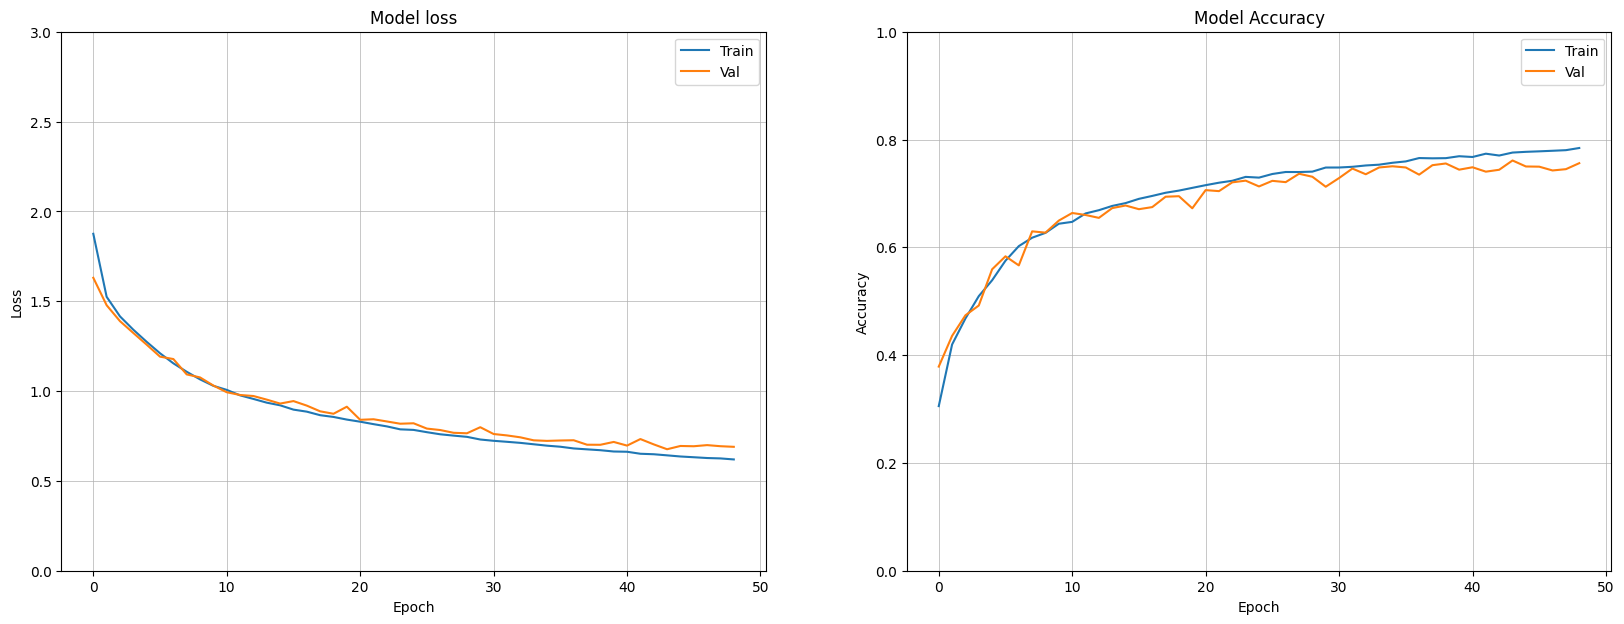

In [17]:
plot_loss_accuracy(history)

**Model evaluation:**

In [18]:
evaluation = model_basic.evaluate(X_test, y_test)
evaluation

169/169 [==============================] - 4s 24ms/step - loss: 0.6516 - accuracy: 0.7683


[0.6516298055648804, 0.7683333158493042]

In [19]:
test_accuracy = evaluation[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 77.0 %


In [20]:
os.getcwd()

'/home/ludovica.baldi/code/pabloknecht/watching-from-above/notebooks'

In [51]:
data_path = '../image_Forest.jpg'

In [52]:
X_test2 = []
X_test2.append(np.array(Image.open(data_path)))
X_test2=np.array(X_test2)

In [53]:
X_test2.shape

(1, 64, 64, 3)

In [54]:
pred = model_basic.predict(X_test2)
pred[0][np.argmax(pred)], np.argmax(pred)

1/1 [==============================] - 0s 31ms/step


(0.94258314, 6)

In [56]:
from tensorflow.keras import models
models.save_model(model_basic, 'my_model2')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
loaded = models.load_model('my_model')